<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2 - Coree Palmer

**17.1 - Interpolation Problem Statement**

When you have a data set consisting of independent data values, $x_i$, and dependent data values, $y_i$ where $i = 1,...,n$, you can find an estimation function y^(x) such that y^($x_i$) = $y_i$ for every point. Given a new x*, we can interpolate its funciton value using y^(x*). We can call y^(x) an interpolation function.

Unlike regression, interpolation doesn't require the user to have an underlying model for the data. The processes still need to underly the data to inform the user about the quality of the interpolation.

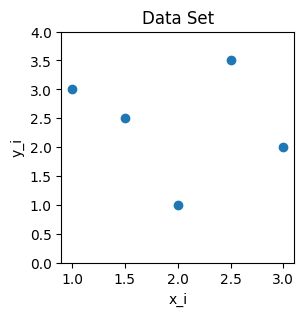

In [2]:
import matplotlib.pyplot as plt
x = [1,1.5,2,2.5,3]
y = [3,2.5,1,3.5,2]

plt.figure(figsize = (3,3))
plt.plot(x,y,'o')
plt.title('Data Set')
plt.ylim(0,4)
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.show()

**17.2 - Linear Interpolation**

In linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and right. We can assume that the x-data points are in ascending order, meaning that $x_i$ < $x_{i+1}$ and $x_i$ < x < $x_{i+1}$. That means that the linear interpolation at x is y^(x) = $y_i$ + [($y_{i+1}$ - $y_i$)(x - $x_i$)]/($x_{i+1}$ - $x_i$).

As an example, we will find the linear interpolation at x = 2.5 based on the data x = [1,2,3], y = [2,3,1] using Python's scipy function.

Since 2 < x < 3, i = 2. By hand, we get the following:
y^(x) = 3 + [(1 - 3)(2.5 - 2)]/(3 - 2) = 2.

In [5]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [1,2,3]
y = [2,3,1]

f = interp1d(x,y)
y_hat = f(2.5)
print(y_hat)

2.0


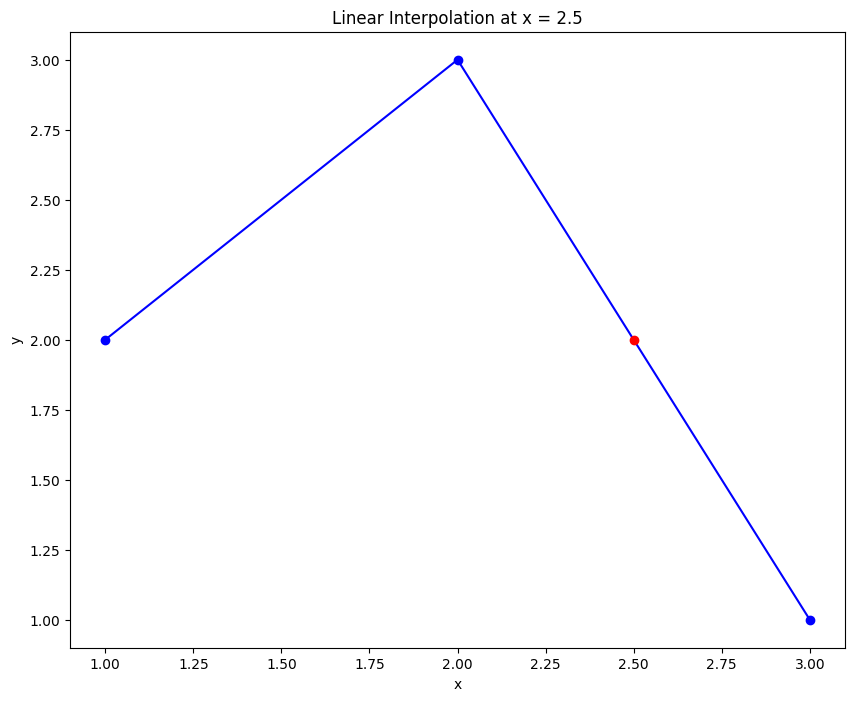

In [6]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'-ob')
plt.plot(2.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 2.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.3 - Cubic Spline Interpolation**

In cubic spline interpolation, the interploating function is s set of piecewise cubic functions. We assume that the points ($x_i$, $y_i$) and ($x_{i+1}$, $y_{i+1}$) are joined by a cubic polynomial $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$ that is valid for $x_i <= x <= x_{i+1}$ for i = 1,...,n-1.

For n points, there are n-1 cubic functions to find, and each cubic function requires four coefficients. That means we have a total of 4(n-1) unknowns.
* Since the cubic functions must intersect the data at the points on the left and the right, we have the following when i = 1,...,n-1:
  * $S_i(x_i) = y_i$
  * $S_i(x_{i+1}) = y_{i+1}$.
  * That gives 2(n-1) equations.
* For the cubic functions to join smoothly with its neighbors, so we constrain the splines to have continuous first and second derivatives at the data points i = 2,...,n-1. That gives us the following when i = 1,...,n-2:
  * $S'_i(x_{i+1}) = S'_{i+1}(x_{i+1})$
  * $S"_i(x_{i+1}) = S"_{i+1}(x_{i+1})$
  * That gives 2(n-2) equations.
* The last two constrainsts are arbitrary and can be chosen to fit the circumstances of the interpolation being performed. A common set of final constraints is to assume the second derivatives are zero at the endpoints. Explicitly, they are the following:
  * $S"_1(x_1) = 0$
  * $S"_{n-1}(x_n) = 0$


As an example, we can use the *CubicSpline* function from Python where x = [0,1,2,3] and y = [2,4,3,1] for 0 <= x <= 3.

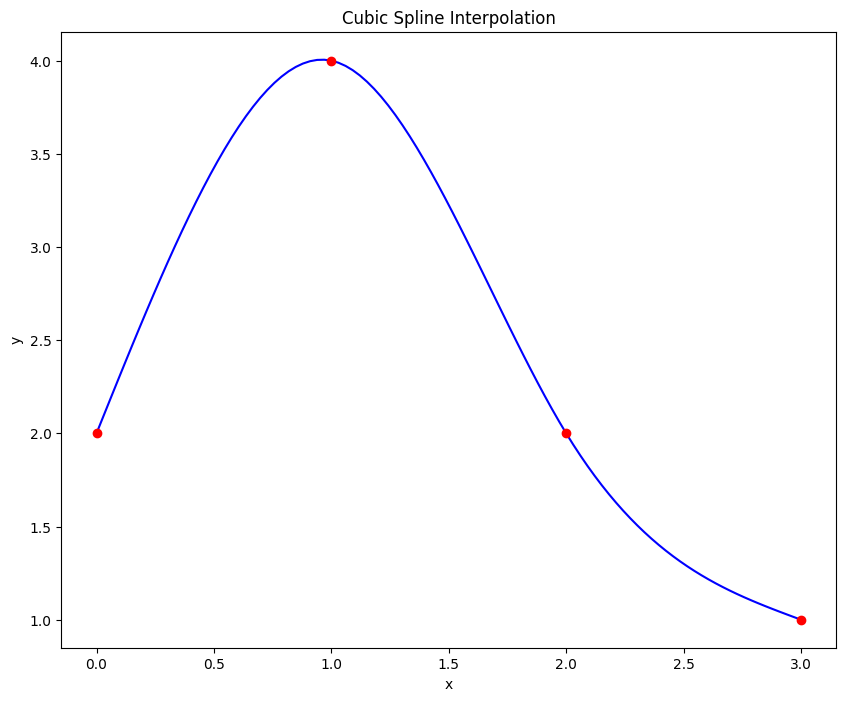

In [2]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [2, 4, 2, 1]

# we will bc_type = 'natural' because it uses the constraints that are described above
f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 3, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This type of interpolation is helpful in more accurately representing things like velocities and acceleration which cannot instantaneously change slope.